Global Nation Economy Data


In [56]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.graph_objs as go 
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import panel.widgets as pnw 
import warnings
warnings.filterwarnings('ignore')
import pycountry
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token('MAPBOX_KEY')

In [2]:
#read in data

data = pd.read_csv('GDP_DF.csv')

In [3]:
#view data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN,NaN


In [4]:
# loop over country list using Unique function to put in order

for country in data['Country Name'].unique():
    print(country)

Aruba
Afghanistan
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Faroe Islands
Micronesia, Fed. Sts.


In [5]:
#check country coide matches name by using unique & size commands.
#unique function returns the sorted unique elements of an array.
#Size function returns the number of elemtns in an object


data['Country Code'].unique().size==data['Country Name'].unique().size 

True

In [6]:
#asses api properties to use for functions
list(pycountry.countries)[0:10]

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')]

In [7]:
#clean False data
#create loop to go through data and identify false countries
#Create a Function to delete False countries from DF

countries_list = [x.alpha_3 for x in pycountry.countries]
result = data['Country Code'].isin(countries_list)
n=[]

for x in range(len(result)):
    if(result[x]==False):
        n.append(x)
        
len(n)

49

In [8]:
only_countries_df = data.drop(n,axis=0)
only_countries_df.count()

Country Name      215
Country Code      215
Indicator Name    215
Indicator Code    215
1960               99
                 ... 
2017              204
2018              202
2019              185
2020                0
Unnamed: 65         0
Length: 66, dtype: int64

In [9]:
def get_largest_GDP(year):
    d = only_countries_df.nlargest(10,year)[year].tolist()
    c = only_countries_df.nlargest(10,year)['Country Name'].tolist()
    plt.figure(figsize=(7,7))
    plt.title(label= "GDP Contribution of the top 10 countries in " + year, fontsize=20, fontweight=20)
    plt.pie(d,labels=c, startangle=80)
    plt.show()
    return plt.show()

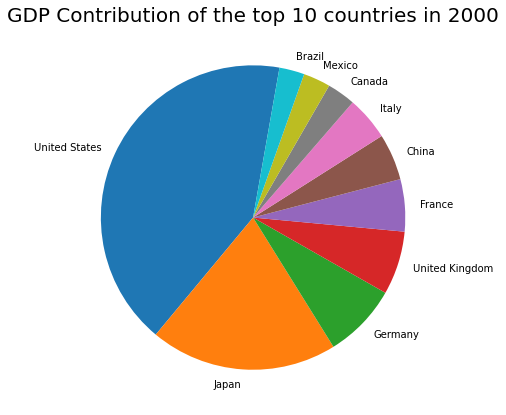

In [10]:
get_largest_GDP('2000')

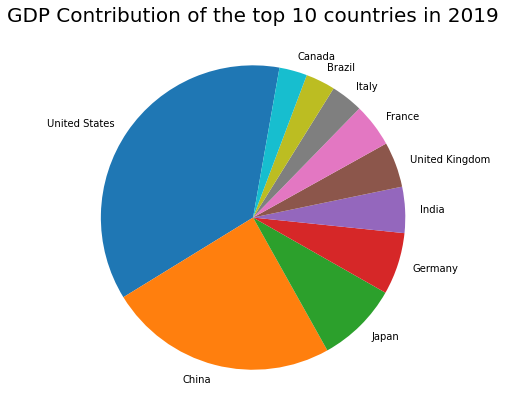

In [11]:
get_largest_GDP('2019')

In [12]:
only_countries_df.set_index('Country Name', inplace=True)
only_countries_df

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN,NaN
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.605496e+08,7.700217e+08,7.569199e+08,7.883073e+08,7.993764e+08,8.321536e+08,8.214961e+08,8.522502e+08,NaN,NaN
"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.320647e+10,4.245062e+10,3.093598e+10,2.673614e+10,2.348627e+10,2.258108e+10,NaN,NaN
South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,...,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,NaN,NaN


In [17]:
# grab Data For plotting comparisons
#specific countries + date range 1995-2021

aus_gdp = only_countries_df.loc['Australia'][38:64]
can_gdp = only_countries_df.loc['Canada'][38:64]
fra_gdp = only_countries_df.loc['France'][38:64]
ger_gdp = only_countries_df.loc['Germany'][38:64]
grc_gdp = only_countries_df.loc['Greece'][38:64]
ita_gdp = only_countries_df.loc['Italy'][38:64]
jpn_gdp = only_countries_df.loc['Japan'][38:64]
esp_gdp = only_countries_df.loc['Spain'][38:64]
swe_gdp = only_countries_df.loc['Sweden'][38:64]
gbr_gdp = only_countries_df.loc['United Kingdom'][38:64]
usa_gdp = only_countries_df.loc['United States'][38:64]


#create new DF

gdp_df = pd.concat([
    aus_gdp, can_gdp, fra_gdp, ger_gdp, grc_gdp,
    ita_gdp, jpn_gdp, esp_gdp, swe_gdp, gbr_gdp, usa_gdp], axis=1
)
gdp_df.head()

,Australia,Canada,France,Germany,Greece,Italy,Japan,Spain,Sweden,United Kingdom,United States
1995,367216364716.36499,604031623433.401001,1601094756209.75,2585792275146.720215,136878365936.167007,1174662070605.02002,5449116304981.099609,614609020549.772949,267305875261.098999,1341584345905.0,7639749000000.0
1996,400302731411.229004,628546387972.130981,1605675086549.560059,2497244606186.640137,145861612400.906006,1312426527795.209961,4833712542207.099609,642588992512.807007,291743811512.078979,1415358814352.570068,8073122000000.0
1997,434568007512.913025,652823920265.781006,1452884917959.090088,2211989623279.950195,143157600149.756989,1241879604365.620117,4414732843544.429688,590077272727.272949,268146144677.730011,1559078258022.27002,8577554457000.0
1998,398899138574.239014,631813279406.807983,1503108739159.439941,2238990774702.680176,144428172489.334991,1270052525928.399902,4032509760872.939941,619214834614.098999,270809066780.713989,1650172242464.389893,9062818202000.0
1999,388608221581.651978,676084000807.699951,1492647560196.040039,2194204133816.320068,142540728744.938995,1252023758789.689941,4562078822335.450195,634693160025.569946,274072182416.730988,1682399288141.080078,9630664202000.0


In [18]:
def get_country_plot(country):
    print(country + " GDP Summary")
    print()
    print('Mean : ', end= '')
    print(only_countries_df.loc[country][3:64].mean())
    print('Total GDP Until Now: ', end='')
    print(only_countries_df.loc[country][3:64].sum())
    print('Maximum GDP: ', end= '')
    print(only_countries_df.loc[country][3:64].max())
    print('Minimum GDP: ', end= '')
    print(only_countries_df.loc[country][3:64].min())
    plt.figure(figsize=(30,22))
    plt.title(label= country + ' GDP Analysis', fontsize=50, fontweight=20)
    plt.ylabel('GDP in terms of $', fontsize=40)
    plt.xlabel('Years',fontsize=40)
    plt.plot(np.arange(1960,2021),only_countries_df.loc[country][3:64])
    plt.xticks(np.arange(1960,2021),np.arange(1960,2021), rotation=45)
    plt.grid()
    return plt.grid()

Australia GDP Summary

Mean : 451117216458.26764
Total GDP Until Now: 27067032987496.06
Maximum GDP: 1576184467015.49
Minimum GDP: 18577668271.9229


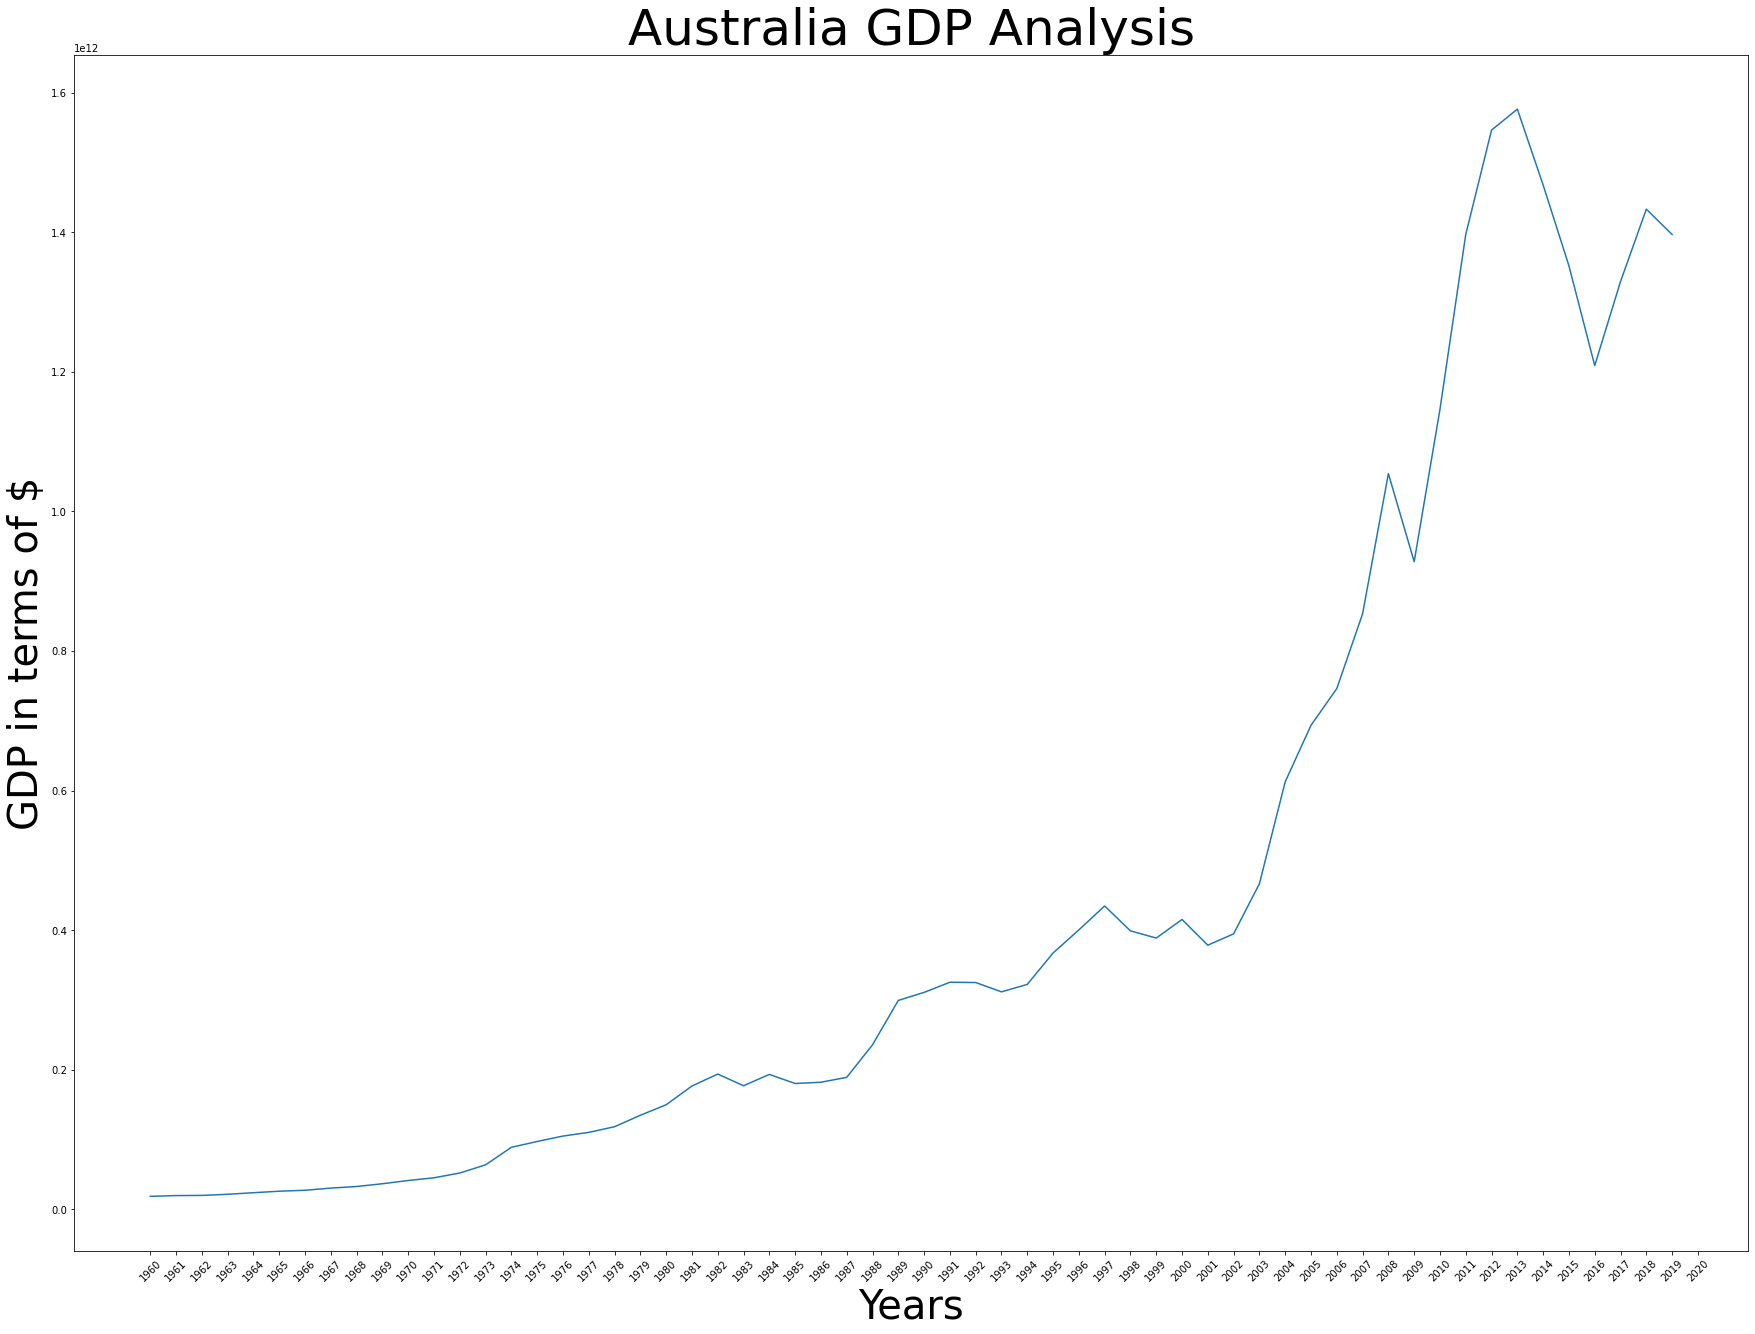

In [19]:
get_country_plot('Australia')

In [20]:
#load Data

gov_dbt = pd.read_csv('DP_LIVE_30092021104414117.csv')
gov_dbt.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GGDEBT,TOT,PC_GDP,A,1995,57.56626,NaN
1,AUS,GGDEBT,TOT,PC_GDP,A,1996,55.41022,NaN
2,AUS,GGDEBT,TOT,PC_GDP,A,1997,54.60069,NaN
3,AUS,GGDEBT,TOT,PC_GDP,A,1998,52.44307,NaN
4,AUS,GGDEBT,TOT,PC_GDP,A,1999,44.78893,NaN


In [21]:
gov_dbt = gov_dbt.rename(columns={'LOCATION': 'COUNTRY', 'TIME': 'YEAR', 'Value': 'Debt to GDP %'})
gov_dbt

,COUNTRY,INDICATOR,SUBJECT,MEASURE,FREQUENCY,YEAR,Debt to GDP %,Flag Codes
0,AUS,GGDEBT,TOT,PC_GDP,A,1995,57.56626,NaN
1,AUS,GGDEBT,TOT,PC_GDP,A,1996,55.41022,NaN
2,AUS,GGDEBT,TOT,PC_GDP,A,1997,54.60069,NaN
3,AUS,GGDEBT,TOT,PC_GDP,A,1998,52.44307,NaN
4,AUS,GGDEBT,TOT,PC_GDP,A,1999,44.78893,NaN
...,...,...,...,...,...,...,...,...
813,LTU,GGDEBT,TOT,PC_GDP,A,2015,53.33852,NaN
814,LTU,GGDEBT,TOT,PC_GDP,A,2016,50.88945,NaN
815,LTU,GGDEBT,TOT,PC_GDP,A,2017,47.00182,NaN
816,LTU,GGDEBT,TOT,PC_GDP,A,2018,40.67271,NaN


In [22]:
#grab Columns for New DF to Plot
debt_value_loc = gov_dbt.loc[:, ['COUNTRY', 'YEAR', 'Debt to GDP %']]
debt_value_loc.set_index('COUNTRY')

,YEAR,Debt to GDP %
COUNTRY,,
AUS,1995,57.56626
AUS,1996,55.41022
AUS,1997,54.60069
AUS,1998,52.44307
AUS,1999,44.78893
...,...,...
LTU,2015,53.33852
LTU,2016,50.88945
LTU,2017,47.00182


In [23]:
#Read in data 

debt_value_loc.pivot(index = 'COUNTRY', columns='YEAR', values='Debt to GDP %')

YEAR,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
COUNTRY,,,,,,,,,,,,,,,,,,,,,
AUS,57.56626,55.41022,54.60069,52.443070,44.78893,41.147500,40.40488,38.672840,35.667260,32.310540,...,46.29339,59.23946,55.70968,61.36842,64.18005,68.39156,65.60463,65.89544,75.87409,96.87581
AUT,69.17403,69.71158,65.37200,67.117010,70.72529,71.049910,72.12190,74.024620,72.532150,71.765300,...,91.47370,97.33756,94.35970,101.86920,101.28520,102.53350,96.54689,90.95426,88.89411,NaN
BEL,139.32170,141.09660,135.44020,139.397000,127.99470,121.658800,120.04640,119.532400,115.745400,111.362100,...,111.61990,120.98750,118.65580,130.61040,126.24320,127.67110,120.86150,117.72670,120.28680,142.44620
CAN,123.96300,130.04630,123.94350,123.471400,113.87590,105.070600,104.77610,103.575200,99.241040,95.322190,...,107.65970,111.30640,107.32340,108.35130,114.63430,114.14870,108.55590,107.38270,106.68080,141.58220
CHE,NaN,NaN,NaN,NaN,54.34225,53.734720,51.90093,57.863650,56.885820,58.018970,...,42.85775,43.37218,42.59903,42.46764,42.37722,41.18677,41.89757,39.75675,40.98116,43.79662
CHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.742710,20.686640,...,17.97313,18.45457,18.90998,22.43379,24.36098,28.09989,29.06645,31.81245,37.77597,43.82093
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.53650,73.09144,75.18874,88.96687,82.77155,NaN
CZE,18.05193,16.65339,17.02323,17.899410,23.71132,24.315700,28.27791,30.584750,33.316590,32.901550,...,46.98329,56.23002,55.96956,54.84251,51.70708,47.43294,43.32781,39.73836,37.46101,46.64058
DEU,54.24562,57.34576,58.83864,61.028430,61.09940,62.609470,61.26124,64.098780,66.919610,68.858970,...,86.40907,88.85776,84.32757,84.10702,80.04520,77.22083,72.62381,69.35149,67.75021,NaN


In [91]:
#create new DF for Clean Plotting

aus_data = debt_value_loc.loc[0:25]
can_data = debt_value_loc.loc[77:102]
fra_data = debt_value_loc.loc[182:206]
ger_data = debt_value_loc.loc[206:230]
grc_data = debt_value_loc.loc[231:256]
ita_data = debt_value_loc.loc[305:329]
jpn_data = debt_value_loc.loc[330:354]
esp_data = debt_value_loc.loc[527:552]
swe_data = debt_value_loc.loc[553:578]
gbr_data = debt_value_loc.loc[612:637]
usa_data = debt_value_loc.loc[638:663]

debt_to_gdp = pd.concat([
    aus_data, can_data, ger_data, esp_data, fra_data, gbr_data, ita_data,
    jpn_data, swe_data, usa_data]).set_index('YEAR')



In [93]:
debt_to_gdp.head()


,COUNTRY,Debt to GDP %
YEAR,,
1995,AUS,57.56626
1996,AUS,55.41022
1997,AUS,54.60069
1998,AUS,52.44307
1999,AUS,44.78893


In [31]:
#read in covid DF

covid_data = pd.read_csv('owid-covid-data-20210928.csv')
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [53]:
#grab relevent data

new_covid_df = covid_data.loc[:, ['location', 'date', 'total_cases', 'gdp_per_capita']]
new_covid_df.head()

,location,date,total_cases,gdp_per_capita
0,Afghanistan,2020-02-24,5.0,1803.987
1,Afghanistan,2020-02-25,5.0,1803.987
2,Afghanistan,2020-02-26,5.0,1803.987
3,Afghanistan,2020-02-27,5.0,1803.987
4,Afghanistan,2020-02-28,5.0,1803.987


In [150]:
#grab relevent countries for comparisons

#debt to gdp
debt_to_gdp

# Gdp and Covid Cases
countries_covid_df = new_covid_df[(new_covid_df['location'].isin(['Australia', 'Canada', 'France', 'Germany', 'Greece', 'Italy','Japan', 'Spain', 'Sweden', 'United States', 'United Kingdom']))]
covid_cases = countries_covid_df
countries_gdp = countries_covid_df.groupby(['location'])['gdp_per_capita'].mean().reset_index().sort_values(by='gdp_per_capita', ascending=False)

KeyError: ('location', 'date', 'total_cases')

In [129]:
#df for plotting

covid_cases

,location,total_cases
10,United States,1.700351e+07
2,France,2.637722e+06
9,United Kingdom,2.460429e+06
7,Spain,1.940936e+06
5,Italy,1.927085e+06
3,Germany,1.622227e+06
1,Canada,6.070956e+05
8,Sweden,4.561992e+05
6,Japan,3.600194e+05
4,Greece,1.816498e+05


In [149]:
gdp_df.hvplot.line(
title='Countries Gdp Relative to USD$',
ylim=(0, 15000000000000),
rot=(45)
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [121]:
debt_to_gdp.hvplot.line(
    title = 'List Countries Debt To GDP Ratio 1995-Current',
    x='YEAR',
    y='Debt to GDP %',
    by='COUNTRY',
    figsize=(50,30)
)

:NdOverlay   [COUNTRY]
   :Curve   [YEAR]   (Debt to GDP %)